In [1]:
import lda
from scipy import sparse
import numpy as np
import json
import gensim 

unable to import 'smart_open.gcs', disabling that module


In [2]:
X_train = sparse.load_npz('/Users/tingchen/Desktop/Yelp Project/data_n_20_removed/X_train.npz')
cc= np.load("/Users/tingchen/Desktop/Yelp Project/data_n_20_removed/y_train.npy")

In [3]:
locs = []
with open("/Users/tingchen/Desktop/Yelp Project/locs_train.json", 'r') as file:
    locs = json.load(file)

In [4]:
ix = X_train.getnnz(1)>0
X_train = X_train[ix]
cc= cc[ix]
locs= np.array(locs)[ix]

In [5]:
model = lda.LDA(n_topics=25, n_regions = 3, n_iter=3000)
model.fit_complete(X_train.astype(np.int32), cc.astype(np.int32), locs)

all zero column in document-term matrix found
/Users/tingchen/Desktop/Yelp_Cultural_Analysis/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):


Initialization 0
Initialization converged: True
[[[[18010 17982 17790 17968 17918 17878 18005 17937 17858 18059 17987
    17878 18046 18041 17894 18046 17996 17871 17991 17932 17875 17930
    17968 17970 17896]
   [51459 51519 51542 51435 51555 51678 51457 51488 51774 51554 51434
    51672 51668 51452 51611 51625 51381 51609 51577 51564 51603 51625
    51445 51533 51571]
   [28200 28134 28198 28123 28171 28175 28052 28272 28105 27972 28184
    28158 27980 28130 28097 27951 28176 28109 28096 28144 28138 28125
    28200 28036 28204]]

  [[63168 63154 63176 63238 63215 63045 63201 63191 63110 63198 63202
    63185 62989 63238 63229 63001 63274 63139 62977 63292 63249 63141
    63282 63215 63095]
   [73328 73103 73408 73332 73234 73374 73340 73166 73285 73431 73226
    73235 73384 73370 73160 73334 73384 73171 73319 73427 73171 73385
    73311 73094 73413]
   [69397 69380 69379 69564 69323 69343 69602 69286 69331 69681 69445
    69224 69736 69377 69232 69681 69321 69333 69622 69320 69310 6

## Display topics

In [6]:
dic = gensim.corpora.Dictionary.load("/Users/tingchen/Desktop/Yelp Project/big_lexicon_n_20_removed")

In [7]:
regions_locs = {i:[] for i in range(3)}

for i, reg in enumerate(list(model.RS)):
    regions_locs[reg].append(model.LS[i])

In [8]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [9]:
gdf_regions = {}

for key in regions_locs.keys():
    df = pd.DataFrame(regions_locs[key], columns= ['lat', 'long'])
    gdf_regions[key] = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.long, df.lat))

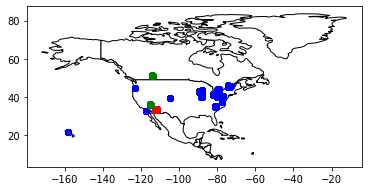

In [10]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')


colors= ['red', 'blue', 'green']

for key, val in gdf_regions.items():
    val.plot(ax=ax, color=colors[key])

plt.show()

In [11]:
n_top_words = 15
n_regions=3
topic_word = model.topic_word_  
collection_word = model.topic_word_collection_ 
region_word = model.topic_word_region_ 

collections = ['Chinese', 'Italian', 'Mexican']

lexicon = np.array(list(dic.values()))

for i, topic_dist in enumerate(topic_word):
    topic_words = lexicon[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}\n'.format(i, ' '.join(topic_words)))
    
    collection_words = collection_word[i, :, :]
    
    for j, eth in enumerate(collections):
        topic_words = lexicon[np.argsort(collection_words[:, j])][:-n_top_words:-1]
        print('Cuisine {}: {}'.format(eth, ' '.join(topic_words)))
        
        
    region_words = region_word[i, :, :]
    
    for k in range(n_regions):
        topic_words = lexicon[np.argsort(region_words[:, k])][:-n_top_words:-1]
        print('Region {}: {}'.format(k, ' '.join(topic_words)))
    print("\n")
    

Topic 0: menu 've well area large quite location best many lot nice places thing visit

Cuisine Chinese: pretty they really chinese there price items better quality first 'm two definitely times
Cuisine Italian: really could 'm two pretty first better bar there they stars new another times
Cuisine Mexican: really 'm pretty two they could first side there times definitely right stars another
Region 0: 're us think couple night thought found find enjoy bit size close group 3
Region 1: 're though bit think found night us couple find thought 3 size group enjoy
Region 2: try 're night couple think thought late found enjoy find group size ordering close


Topic 1: tasted even 've never not worst disappointed eat got way money chicken wo mediocre

Cuisine Chinese: chicken better could chinese fried really ever give much meat dish soup flavor went
Cuisine Italian: better sauce could much pasta really cheese cold ever give cooked flavor dish italian
Cuisine Mexican: better really could meat fla

Region 1: us came wait server waitress told another waiting waiter could take first come two
Region 2: us came wait server waiter told another waitress waiting could take sat come first


Topic 12: said customer asked never even called when phone wrong rude know gave business customers

Cuisine Chinese: ordered minutes delivery got '' give went manager panda hour phone delivered today 30
Cuisine Italian: pizza ordered minutes delivery manager '' hour got called give later driver delivered still
Cuisine Mexican: drive got manager minutes '' went ordered give line location thru today come cashier
Region 0: order told they could take call make going took times 2 card so pick
Region 1: order told they call take could 2 ordering pick times make last orders ever
Region 2: order told they could call take 2 took so make card going times first


Topic 13: people even my dirty said know eat looked kitchen look he door hair not

Cuisine Chinese: around never '' front lady way saw room old hakkasa

Topic 24: without think left upon us unfortunately that stuffed might business person attention given several

Cuisine Chinese: '' much even in eat served variety vegetables however asian still also water actually
Cuisine Italian: '' in served everyone fact course inside glass after ordered birthday perhaps evening love
Cuisine Mexican: '' inside much love served in everyone order fact around put after options filled
Region 0: experience menu cheese thing owner come red dinner something room made plate high lot
Region 1: experience menu quite ' tables as decor something thing fish 've cheese small meal
Region 2: experience table thing dinner shrimp he order made drinks meal people dining cheese happy


